#Import libraries

In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import copy
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [ ]:
stock_df = pd.read_csv('/content/drive/MyDrive/Python+for+Financial+Analysis+-+Course+Package/Part 2. Financial Analysis in Python/stock.csv')

In [ ]:
# Sort the stock data by date
stock_df.sort_values('Date',ascending= True)

Date        AAPL          BA  ...         TSLA         GOOG        sp500
0     2012-01-12   60.198570   75.510002  ...    28.250000   313.644379  1295.500000
1     2012-01-13   59.972858   74.599998  ...    22.790001   311.328064  1289.089966
2     2012-01-17   60.671429   75.239998  ...    26.600000   313.116364  1293.670044
3     2012-01-18   61.301430   75.059998  ...    26.809999   315.273285  1308.040039
4     2012-01-19   61.107143   75.559998  ...    26.760000   318.590851  1314.500000
...          ...         ...         ...  ...          ...          ...          ...
2154  2020-08-05  440.250000  174.279999  ...  1485.020020  1473.609985  3327.770020
2155  2020-08-06  455.609985  172.199997  ...  1489.579956  1500.099976  3349.159912
2156  2020-08-07  444.450012  170.020004  ...  1452.709961  1494.489990  3351.280029
2157  2020-08-10  450.910004  179.410004  ...  1418.569946  1496.099976  3360.469971
2158  2020-08-11  437.500000  180.130005  ...  1374.390015  1480.319946  3333.689941

[2159 rows x 10 columns]

In [ ]:
stock_df.describe()

AAPL           BA  ...         GOOG        sp500
count  2159.000000  2159.000000  ...  2159.000000  2159.000000
mean    140.819823   189.942700  ...   783.712512  2218.749554
std      70.827601   103.678586  ...   334.448057   537.321727
min      55.790001    67.239998  ...   278.481171  1278.040039
25%      89.165714   124.015000  ...   527.214416  1847.984985
50%     116.599998   142.419998  ...   737.599976  2106.629883
75%     175.019997   297.044998  ...  1079.744995  2705.810059
max     455.609985   440.619995  ...  1568.489990  3386.149902

[8 rows x 9 columns]

#Visualization

##Visualizing raw stock prices


In [ ]:
def plotting(df,fig_title):
  df.plot(x = 'Date', figsize = (15,7), linewidth = 3, title = fig_title)
  plt.grid()
  plt.show()

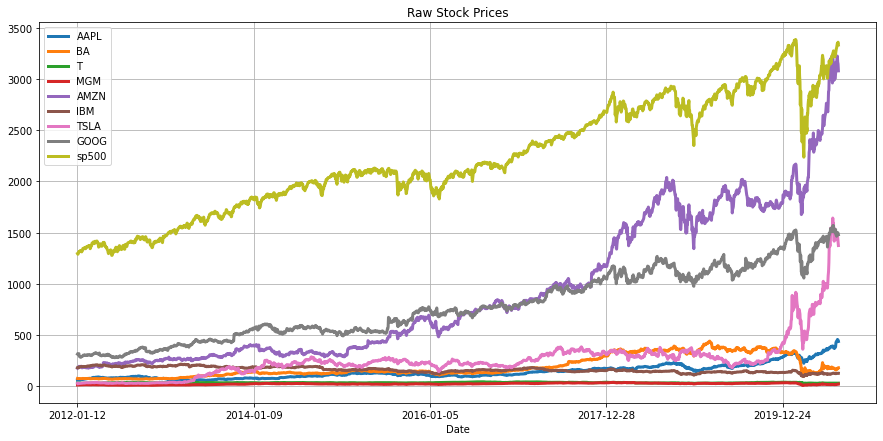

In [ ]:
plotting(stock_df, 'Raw Stock Prices')

##Visualizing normalized stock prices

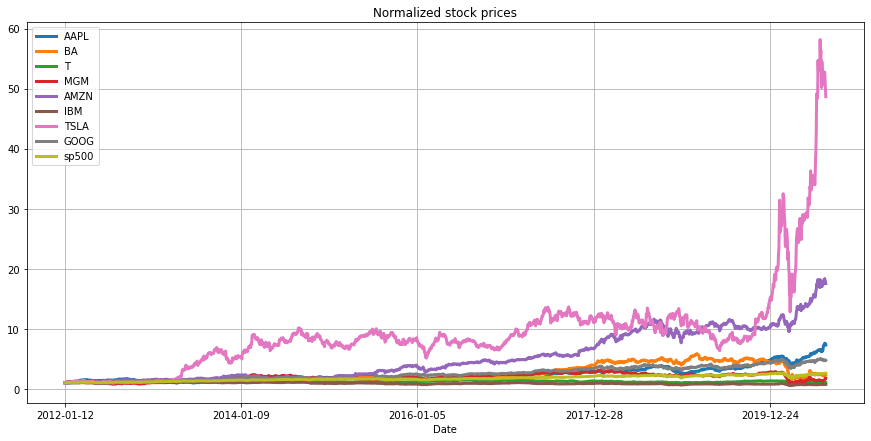

In [ ]:
def normalized(df):
  copy_df = df.copy()
  for i in copy_df.columns[1:]:
    copy_df[i] = copy_df[i]/copy_df[i][0]
  return copy_df
plotting(normalized(stock_df),'Normalized stock prices')

##Interactive Plots

In [ ]:
def interactive_plot(df,title):
  fig = px.line(title=title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'],y = df[i], name = i )
  fig.show()
interactive_plot(stock_df,'Raw Stock Prices')

#Calculating daily returns

In [ ]:
def daily_return(df):
  df_daily_return = df.copy()
  for i in df.columns[1:]:
    for j in range(1,len(df)):
      df_daily_return[i][j] = ((df[i][j]-df[i][j-1])/df[i][j-1])*100
    df_daily_return[i][0] = 0
  return df_daily_return
daily_return(stock_df)

Date      AAPL        BA  ...       TSLA      GOOG     sp500
0     2012-01-12  0.000000  0.000000  ...   0.000000  0.000000  0.000000
1     2012-01-13 -0.374946 -1.205144  ... -19.327430 -0.738516 -0.494792
2     2012-01-17  1.164812  0.857909  ...  16.717854  0.574410  0.355295
3     2012-01-18  1.038382 -0.239234  ...   0.789470  0.688856  1.110793
4     2012-01-19 -0.316937  0.666134  ...  -0.186494  1.052283  0.493866
...          ...       ...       ...  ...        ...       ...       ...
2154  2020-08-05  0.362467  5.579446  ...  -0.133153  0.589774  0.642974
2155  2020-08-06  3.488923 -1.193483  ...   0.307062  1.797626  0.642770
2156  2020-08-07 -2.449458 -1.265966  ...  -2.475194 -0.373974  0.063303
2157  2020-08-10  1.453480  5.522880  ...  -2.350092  0.107728  0.274222
2158  2020-08-11 -2.973987  0.401316  ...  -3.114399 -1.054744 -0.796913

[2159 rows x 10 columns]

In [ ]:
interactive_plot(daily_return(stock_df),'Daily returns')